In [2]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
import scipy.io as sio
import netCDF4 as nc
import glob, os
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['animation.embed_limit'] =1e20
import cmocean
import xarray as xr
from gsw import sigma0, rho

In [4]:
%cd /work/eay/MITgcm_data/Experiment26/
# Time = xr.open_dataset('Temp.nc')['T']
# Temp = xr.open_dataset('Temp.nc')['Temp'][-1,:,500:600,:].mean('Y')
# Salt = xr.open_dataset('Salt.nc')['S'][-1,:,500:600,:].mean('Y')
# Density = rho(Salt, Temp,0)
# V    = xr.open_dataset('V.nc')['V'][-1,:,500:600,:].mean('Yp1')

Time = xr.open_dataset('Temp.nc')['T']
Temp = xr.open_dataset('Temp.nc')['Temp'][-1,:,570:590,:].mean('Y')
Salt = xr.open_dataset('Salt.nc')['S'][-1,:,570:590,:].mean('Y')
Density = rho(Salt, Temp,0)
V    = xr.open_dataset('V.nc')['V'][-1,:,570:590,:].mean('Yp1')

f=8.e-5;
rho_0=1024;
g = 9.8;
%cd /work/eay/MITgcm_data/

dvg_dz = (-g/(f*rho_0))*Density.differentiate('X')
dv_dz = V.differentiate('Z')
ageostrophic = dvg_dz-dv_dz

dvg_dz=dvg_dz.where(Salt>0)
dv_dz=dv_dz.where(Salt>0)
ageostrophic=ageostrophic.where(Salt>0)

/work2/eay/MITgcm_data/Experiment26
/work2/eay/MITgcm_data


In [5]:
drhodx = Density.differentiate('X')
dvdz = V.differentiate('Z')
drhodz = Density.differentiate('Z')
dvdx = V.differentiate('X')

EPV=(g/rho_0)*(drhodx*dvdz)-(g/rho_0)*drhodz*(dvdx+f)
EPV=EPV.where(Salt>0)

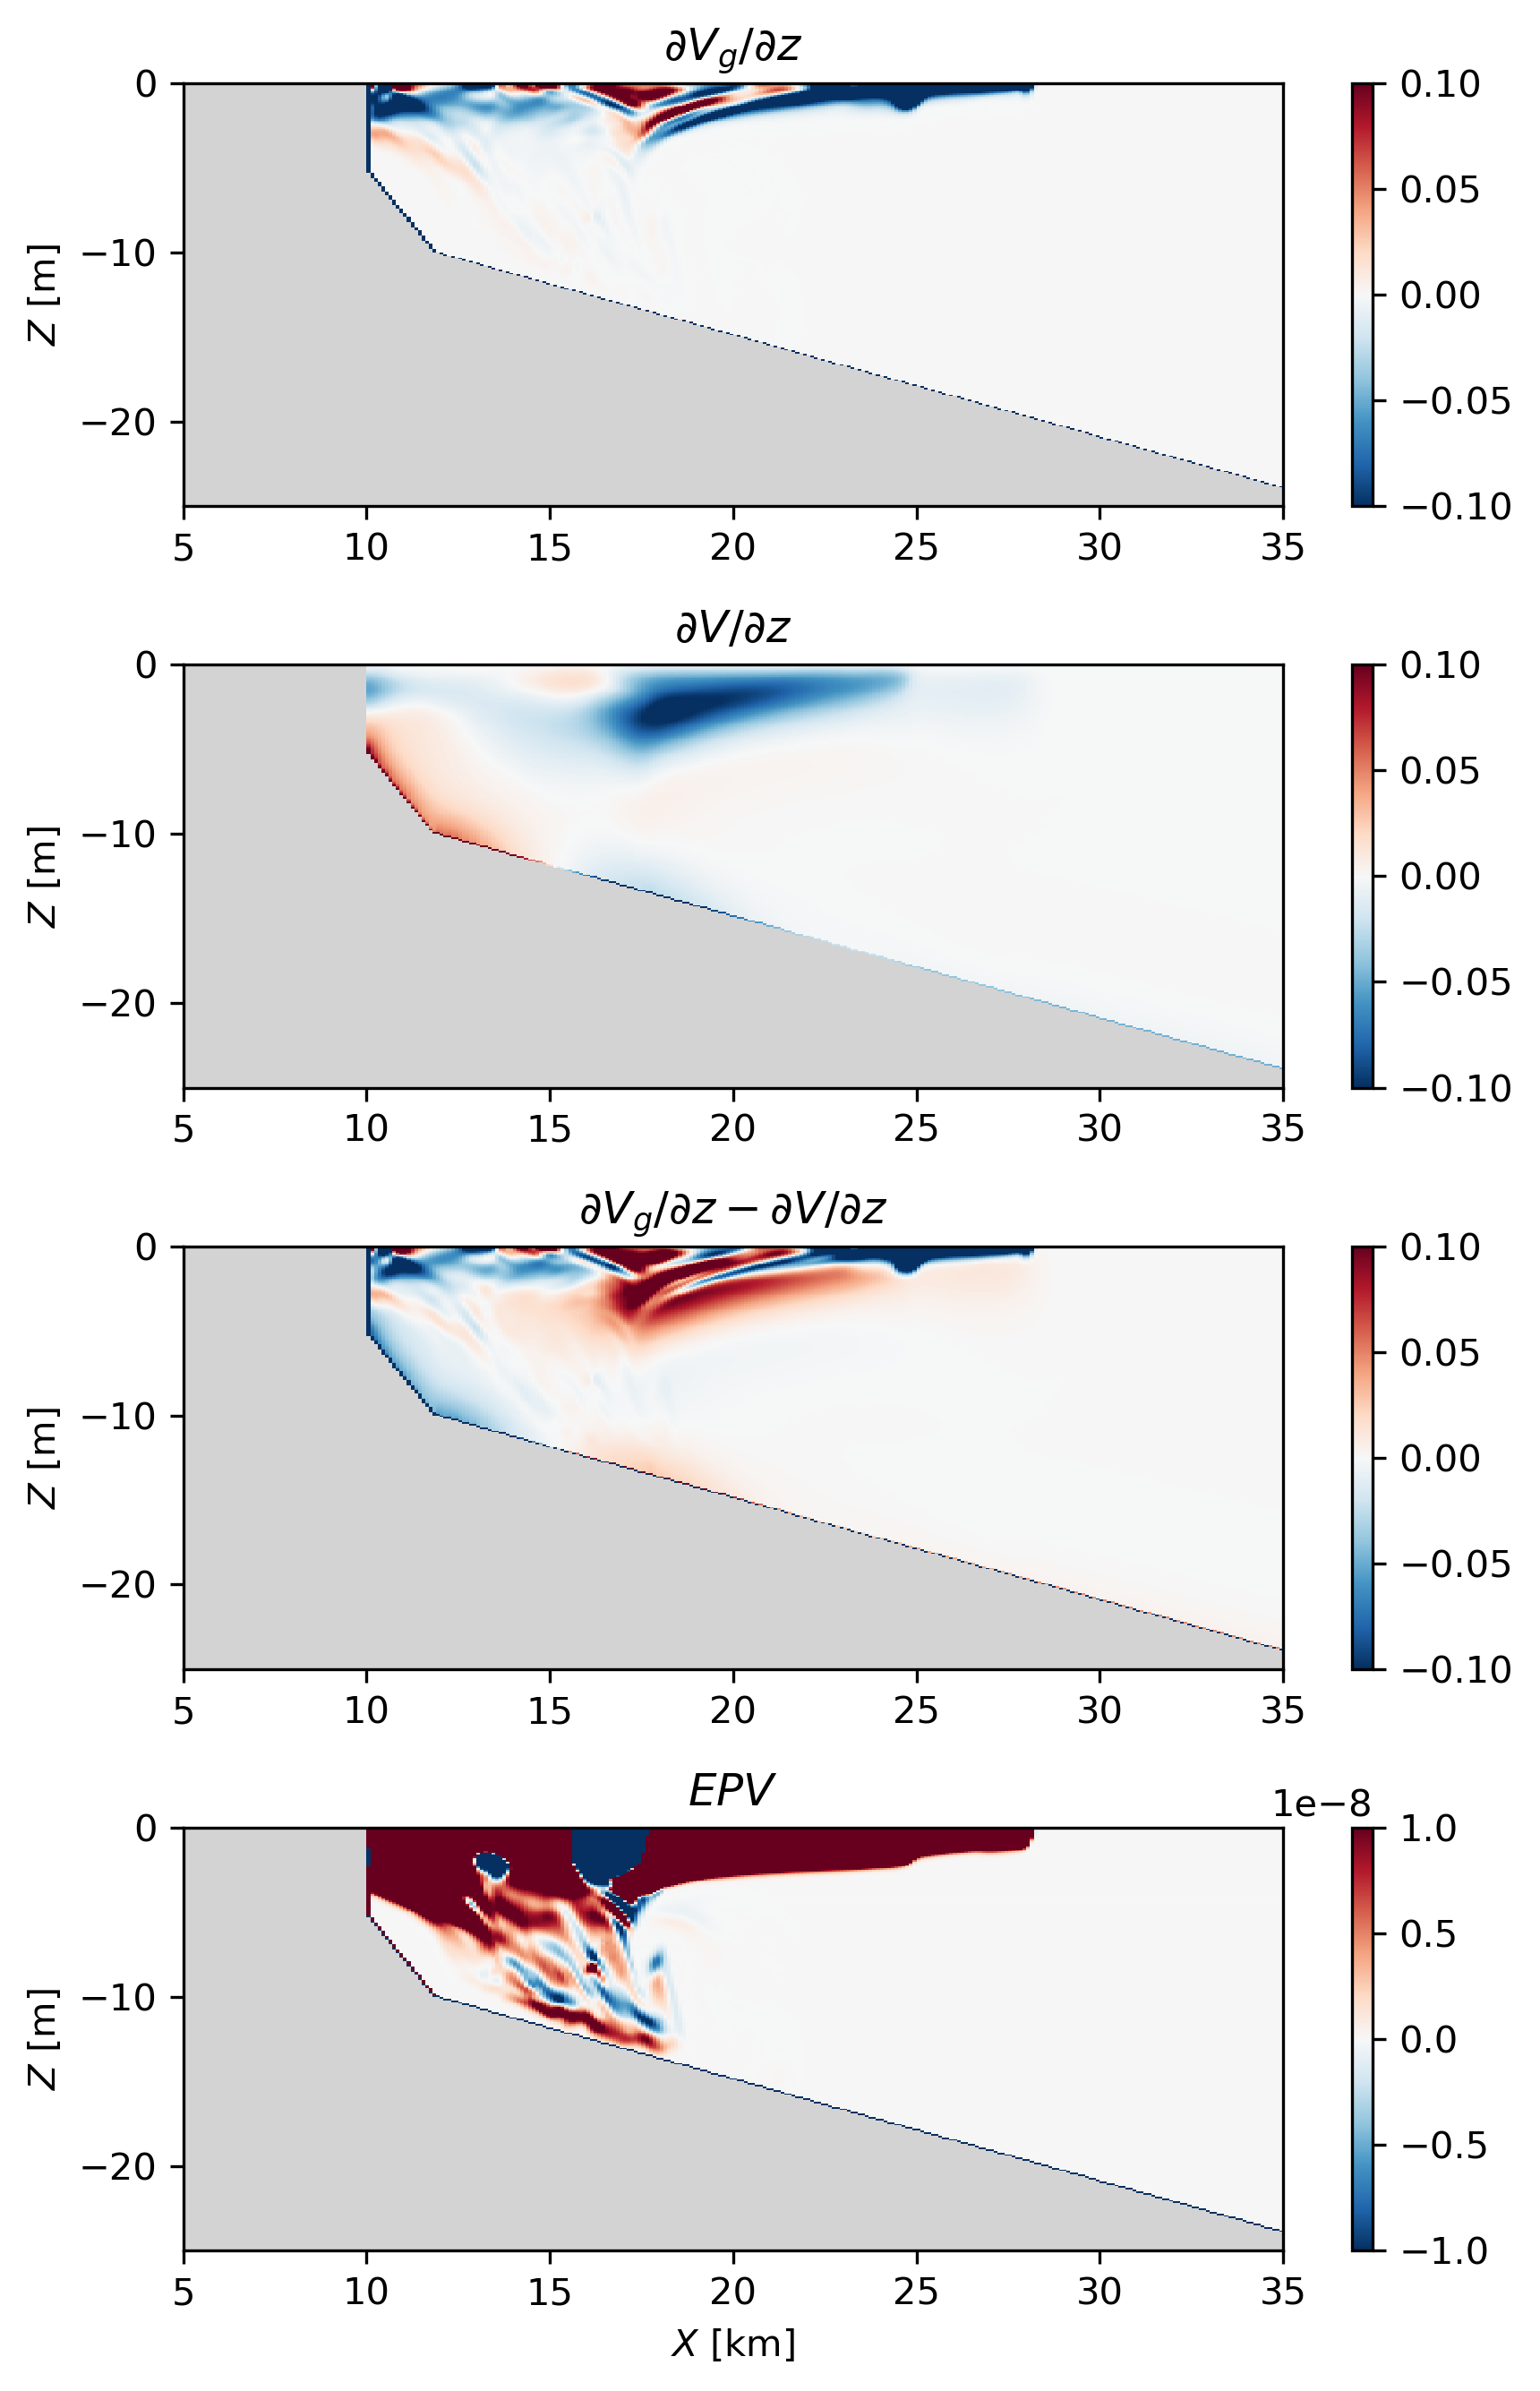

In [6]:
plt.figure(figsize=(6,9),dpi=300)

cmin=-1e-1; cmax=1e-1;
plt.subplot(4,1,1)
plt.xlim([5,35])
plot1=plt.pcolormesh(dvg_dz.X/1000,dvg_dz.Z,dvg_dz,cmap=matplotlib.cm.get_cmap("RdBu_r").copy(),vmin=cmin,vmax=cmax)
plt.title(r'$\partial V_g/\partial z$')
#plt.xlabel('$X$ [km]');
plt.ylabel('$Z$ [m]')
current_cmap = plot1.get_cmap()
current_cmap.set_bad(color='#D3D3D3')
plt.colorbar()

plt.subplot(4,1,2)
plt.xlim([5,35])
plot1=plt.pcolormesh(dv_dz.X/1000,dv_dz.Z,dv_dz,cmap=matplotlib.cm.get_cmap("RdBu_r").copy(),vmin=cmin,vmax=cmax)
plt.title(r'$\partial V/\partial z$')
#plt.xlabel('$X$ [km]');
plt.ylabel('$Z$ [m]')
current_cmap = plot1.get_cmap()
current_cmap.set_bad(color='#D3D3D3')
plt.colorbar()



plt.subplot(4,1,3)
plt.xlim([5,35])
plot1=plt.pcolormesh(dvg_dz.X/1000,dvg_dz.Z,(dvg_dz-dv_dz),cmap=matplotlib.cm.get_cmap("RdBu_r").copy(),vmin=cmin,vmax=cmax)
plt.title(r'$\partial V_g/\partial z-\partial V/\partial z$')
#plt.xlabel('$X$ [km]');
plt.ylabel('$Z$ [m]')
current_cmap = plot1.get_cmap()
current_cmap.set_bad(color='#D3D3D3')
plt.colorbar()

cmin=-1e-8; cmax=1e-8;
plt.subplot(4,1,4)
plt.xlim([5,35])
plot1=plt.pcolormesh(dvg_dz.X/1000,dvg_dz.Z,EPV,cmap=matplotlib.cm.get_cmap("RdBu_r").copy(),vmin=cmin,vmax=cmax)
plt.title(r'$EPV$')
plt.xlabel('$X$ [km]');plt.ylabel('$Z$ [m]')
current_cmap = plot1.get_cmap()
current_cmap.set_bad(color='#D3D3D3')
plt.colorbar()

plt.tight_layout()


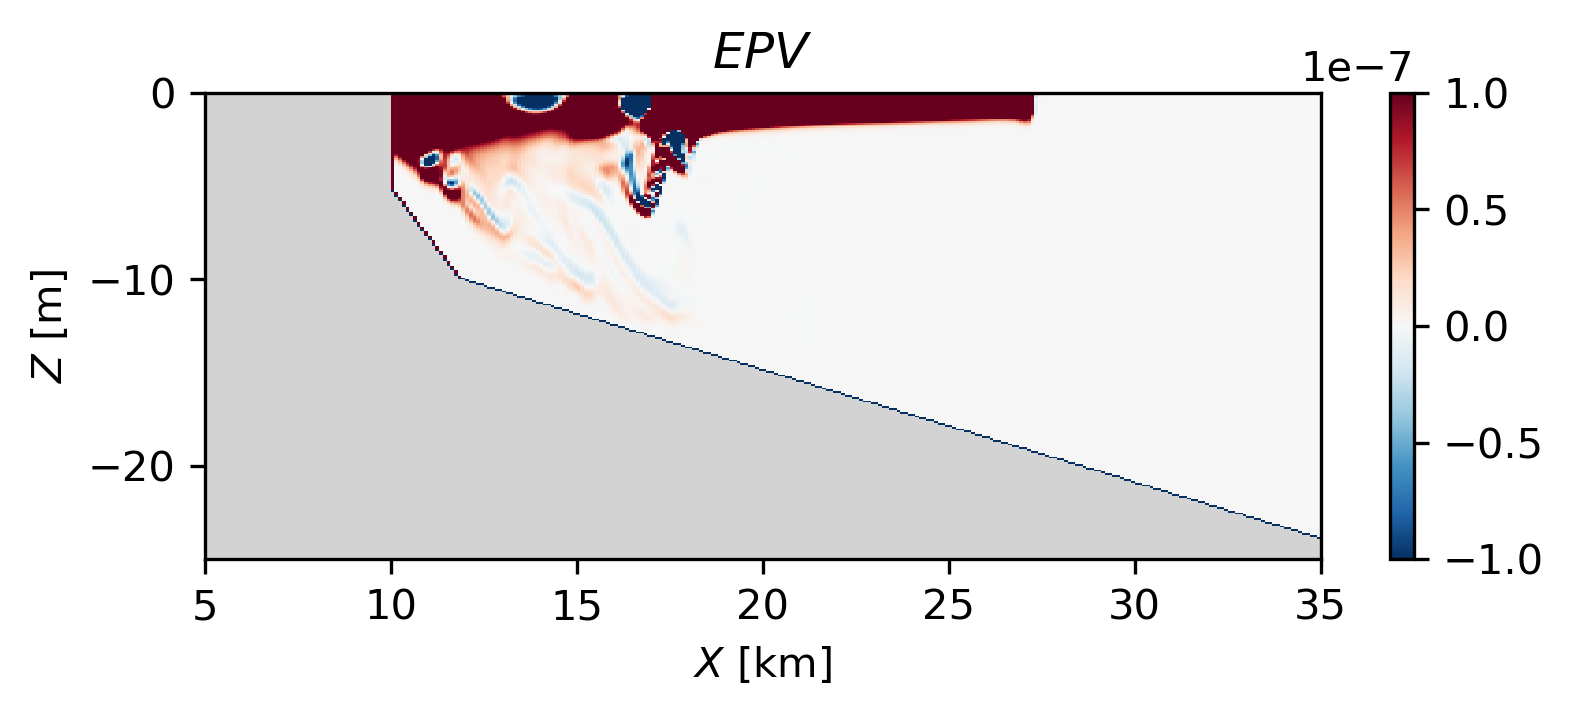

In [25]:
plt.figure(figsize=(6,7),dpi=300)

cmin=-1e-7; cmax=1e-7;
plt.subplot(3,1,1)
plt.xlim([5,35])
plot1=plt.pcolormesh(dvg_dz.X/1000,dvg_dz.Z,EPV,cmap=matplotlib.cm.get_cmap("RdBu_r").copy(),vmin=cmin,vmax=cmax)
plt.title(r'$EPV$')
plt.xlabel('$X$ [km]');plt.ylabel('$Z$ [m]')
current_cmap = plot1.get_cmap()
current_cmap.set_bad(color='#D3D3D3')
plt.colorbar()

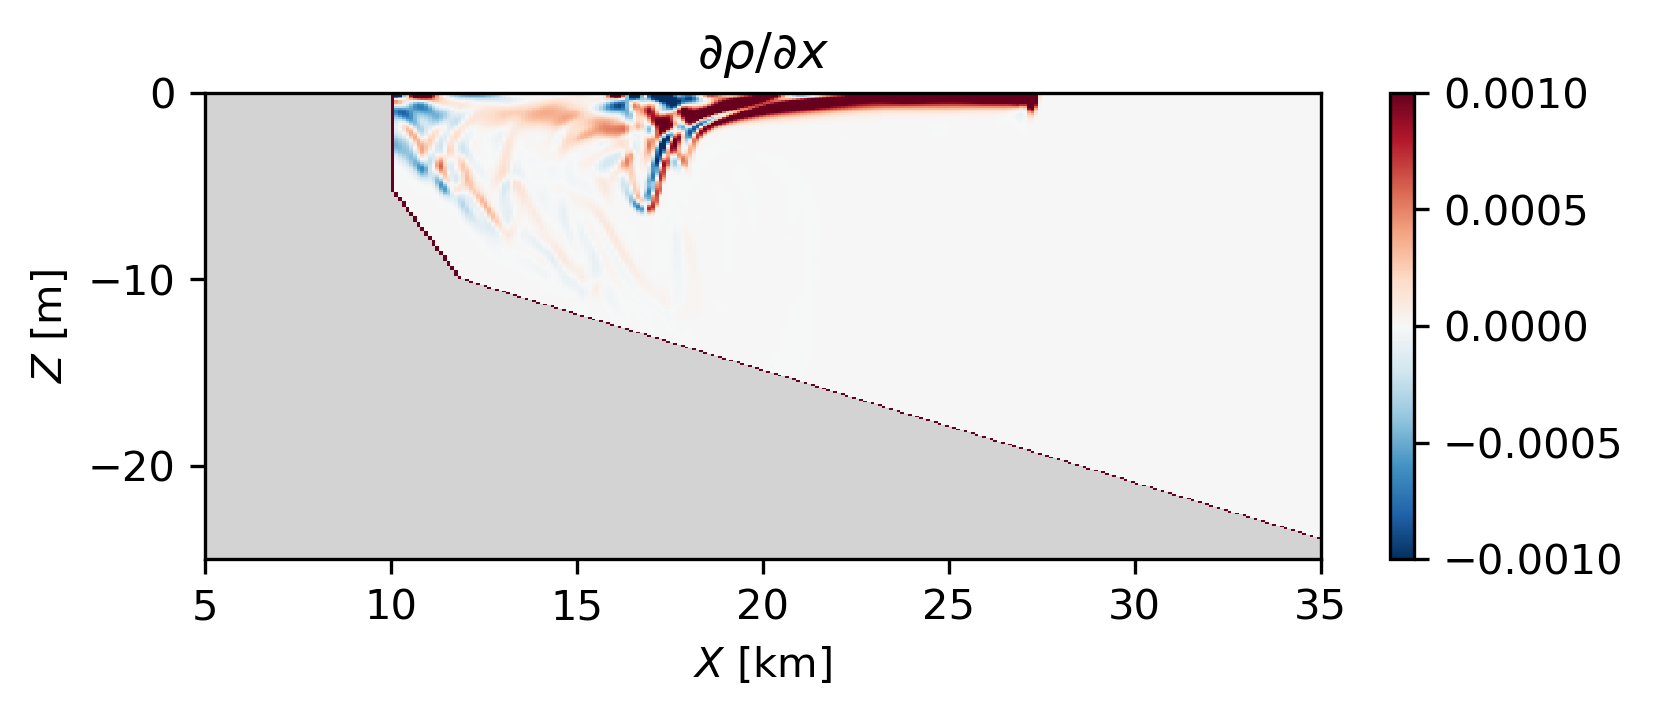

In [27]:
plt.figure(figsize=(6,7),dpi=300)

cmin=-1e-3; cmax=1e-3;
drhodx=drhodx.where(Salt>0)
plt.subplot(3,1,1)
plt.xlim([5,35])
plot1=plt.pcolormesh(dvg_dz.X/1000,dvg_dz.Z,drhodx,cmap=matplotlib.cm.get_cmap("RdBu_r").copy(),vmin=cmin,vmax=cmax)
plt.title(r'$\partial \rho/\partial x$')
plt.xlabel('$X$ [km]');plt.ylabel('$Z$ [m]')
current_cmap = plot1.get_cmap()
current_cmap.set_bad(color='#D3D3D3')
plt.colorbar()

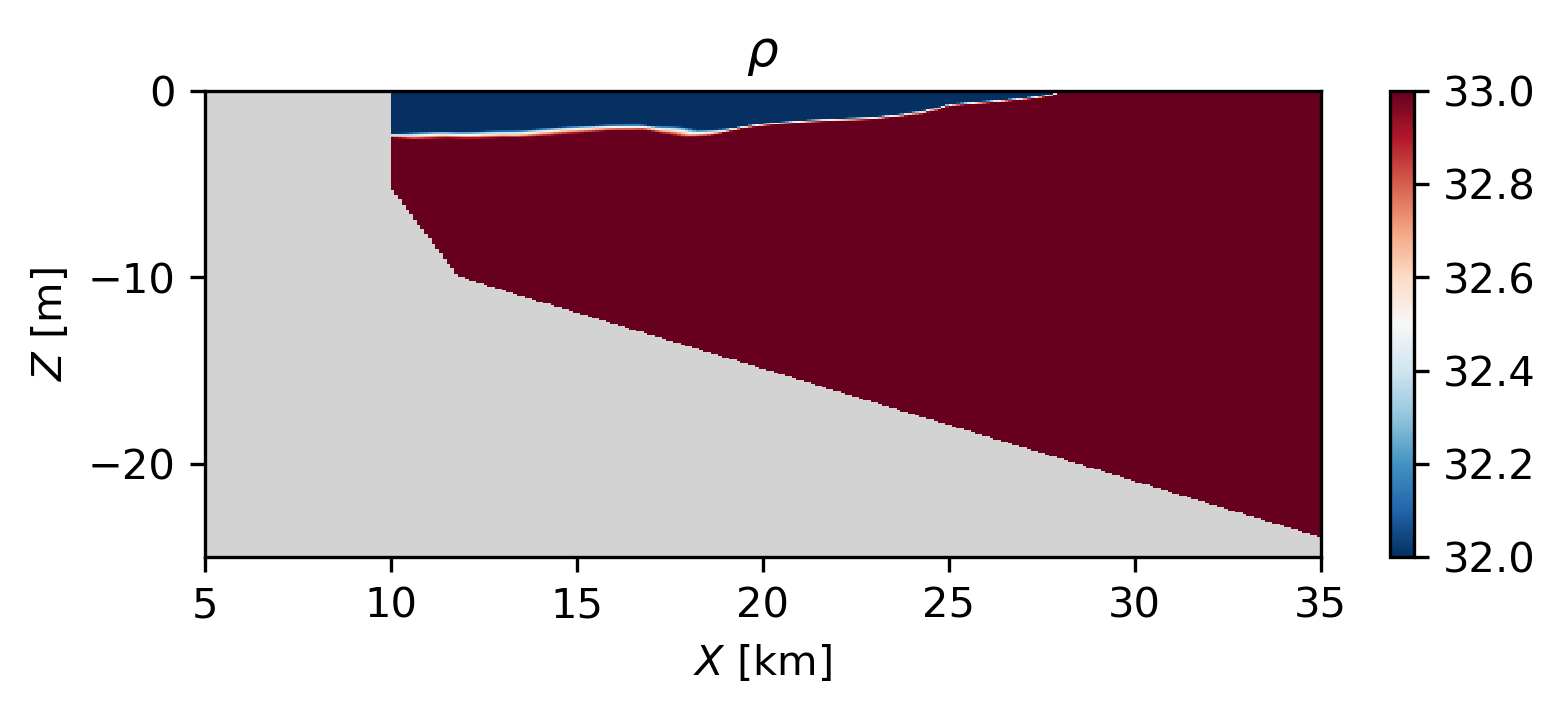

In [38]:
plt.figure(figsize=(6,7),dpi=300)
Salt_plot=Salt.where(Salt>0)
cmin=32; cmax=33;
drhodx=drhodx.where(Salt>0)
plt.subplot(3,1,1)
plt.xlim([5,35])
plot1=plt.pcolormesh(dvg_dz.X/1000,dvg_dz.Z,Salt_plot,cmap=matplotlib.cm.get_cmap("RdBu_r").copy(),vmin=cmin,vmax=cmax)
plt.title(r'$\rho$')
plt.xlabel('$X$ [km]');plt.ylabel('$Z$ [m]')
current_cmap = plot1.get_cmap()
current_cmap.set_bad(color='#D3D3D3')
plt.colorbar()

# 